# ***Workspace information***

In [3]:
!uname -a

!free -h

!python --version

!cat /proc/cpuinfo

Linux 47fed55f2b96 6.1.85+ #1 SMP PREEMPT_DYNAMIC Sun Apr 28 14:29:16 UTC 2024 x86_64 x86_64 x86_64 GNU/Linux
               total        used        free      shared  buff/cache   available
Mem:            12Gi       828Mi       8.1Gi       1.0Mi       3.7Gi        11Gi
Swap:             0B          0B          0B
Python 3.10.12
processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowp

# ***Workspace Setup***

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os, glob

my_name = 'GRN_Dynamics.ipynb'
my_path = glob.glob(os.getcwd() + '/**/' + my_name, recursive = True)
current_dir = os.path.dirname(my_path[0])
os.chdir(current_dir)

In [ ]:
!ls

# ***Testing:***

In [7]:
!pytest

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0
rootdir: /content/drive/MyDrive/Colab Notebooks/GRN_Dynamics
plugins: anyio-3.7.1
collected 1 item                                                                                   

tests/data/test_data.py .                                                                    [100%]

======================================== 1 passed in 9.90s =========================================


# ***Part I: Data Preparation, Visualization, and Exploration***

In [8]:
from importlib.machinery import SourceFileLoader
data_module = SourceFileLoader("data_module", "src/data/data_module.py").load_module()
graph_module = SourceFileLoader("graph_module", "src/data/graph_module.py").load_module()

In [9]:
#Every result as an attribute so later I can have for different patients etc
data_instance = data_module.Data()
data_instance.print_info()

Gene names:
 ['CD44' 'CHI3L1' 'CREB1' 'E2F1' 'E2F2' 'EGFR' 'EGR1' 'ETS1' 'FOXM1'
 'HIF1A' 'IDH1' 'IDH2' 'KLF4' 'L1CAM' 'MDM2' 'MGMT' 'NANOG' 'NEFL' 'NFIB'
 'OLIG2' 'PAX2' 'PAX5' 'PAX8' 'PGK1' 'PTEN' 'RUNX2' 'SALL4' 'SMAD3'
 'SOX17' 'SOX2' 'SOX4' 'SOX9' 'SP1' 'SP3' 'STAT3' 'TERT' 'TP53' 'TWIST1'
 'VDR' 'YY1']
Number of genes: 40
Number of samples: 1026


In [10]:
###### Graph visualization
# graph_instance = graph_module.GRN(data_instance.genes_names, data_instance.genes_len, \
#                            data_instance.matrix_activation_numeric, data_instance.matrix_inhibition_numeric)
# graph_instance.graph_print()

In [11]:
###### Selecting specific markers and the respective datapoints for clusterization
markers_list = ["CD44", "EGFR", "IDH1", "NEFL"]
data_instance.generate_marker_genes_combinations(markers_list, show_values = True)

Number of markers combinations: 6
Markers combinations numbers: [(0, 5), (0, 10), (0, 17), (5, 10), (5, 17), (10, 17)]
Markers combinations names:
 [['CD44' 'EGFR']
 ['CD44' 'IDH1']
 ['CD44' 'NEFL']
 ['EGFR' 'IDH1']
 ['EGFR' 'NEFL']
 ['IDH1' 'NEFL']]


Progress: 100%|██████████| 6/6 [00:00<00:00, 86.41it/s]


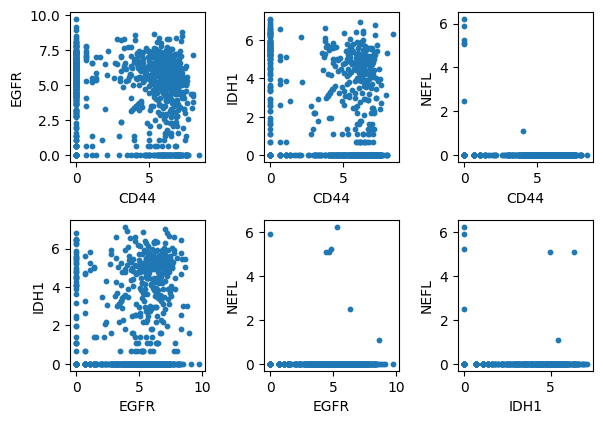

In [12]:
###### Dispersion Plots
data_instance.generate_markers_dispersion(show_plots = True)

Progress: 100%|██████████| 40/40 [00:00<00:00, 71.48it/s]


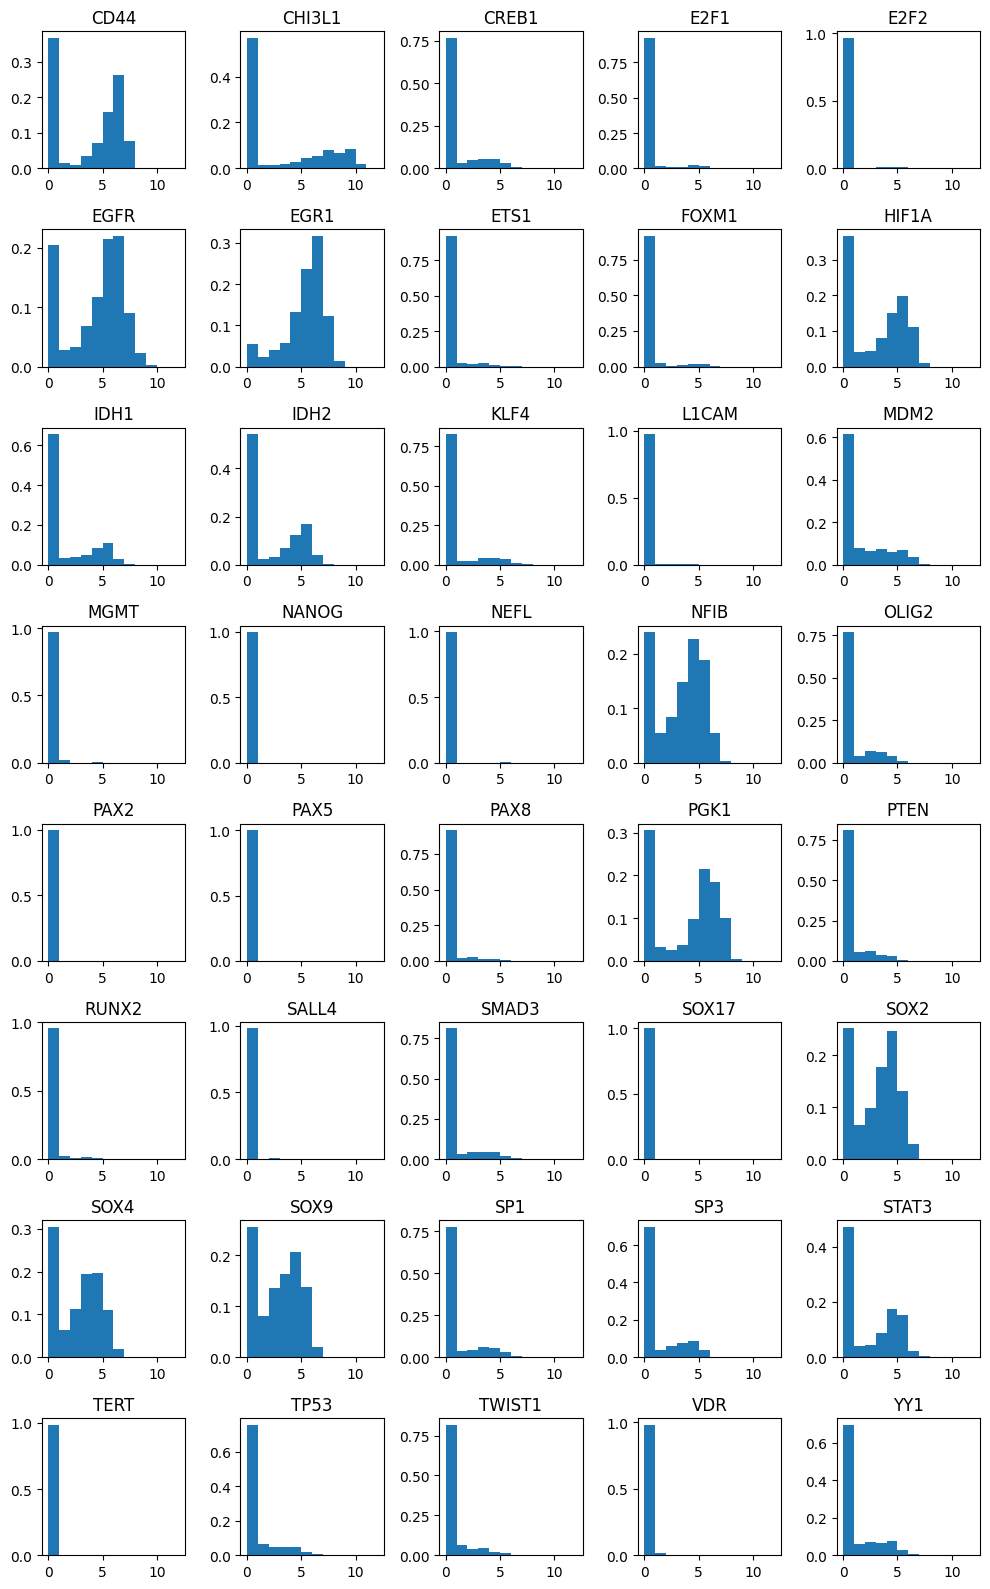

In [13]:
###### Histograms
data_instance.generate_histograms_plots()

Running t-SNE: 100%|██████████| 5/5 [00:41<00:00,  8.29s/it]


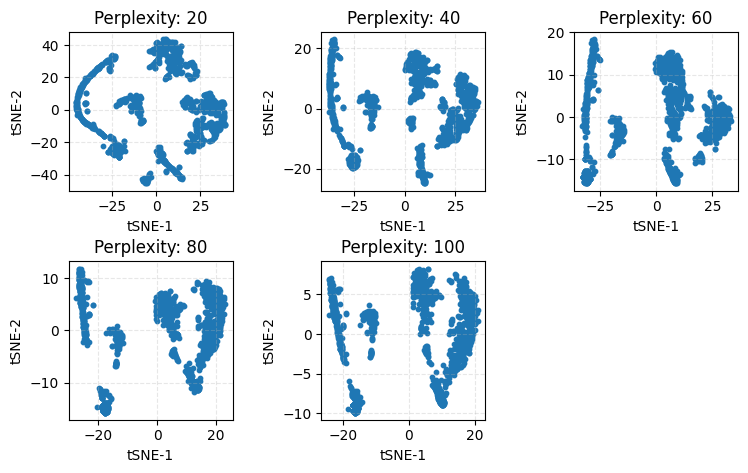

In [14]:
###### tSNE using different perplexity values
data_instance.generate_tsne_plots()

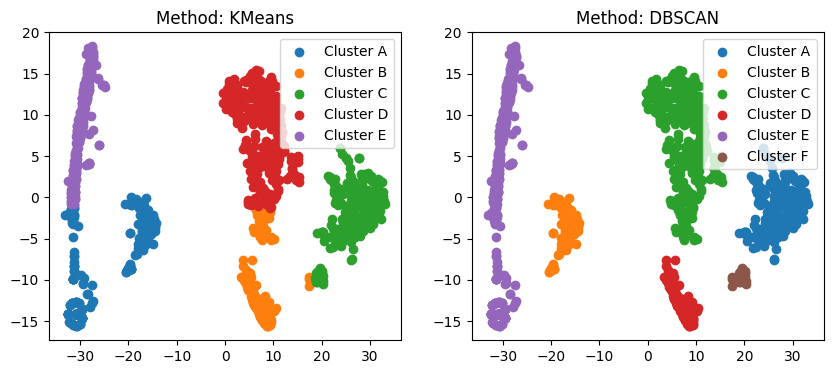

In [15]:
###### Clustering in the reduced dimension
data_instance.generate_clustering_reduced_dimension()

In [16]:
###### Clustering and statistics
data_instance.generate_clusters_and_statistcs()